In [101]:
import pandas as pd
import numpy as np

In [102]:
train = pd.read_csv("https://raw.githubusercontent.com/Leander-Antony/Bharat-Intern/main/Titanic_classification/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Leander-Antony/Bharat-Intern/main/Titanic_classification/test.csv")

### Data description

| Feature  | Description            | Notes                                      |
|----------|------------------------|--------------------------------------------|
| survived | Survival               | 0 = No, 1 = Yes                            |
| pclass   | Ticket class           | 1 = 1st, 2 = 2nd, 3 = 3rd                 |
| sex      | Sex                    |                                            |
| Age      | Age in years           |                                            |
| sibsp    | # of siblings / spouses aboard the Titanic |                                    |
| parch    | # of parents / children aboard the Titanic |                                    |
| ticket   | Ticket number          |                                            |
| fare     | Passenger fare         |                                            |
| cabin    | Cabin number           |                                            |
| embarked | Port of Embarkation    | C = Cherbourg, Q = Queenstown, S = Southampton |


In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
train.drop(["PassengerId","Cabin","Name","Ticket"],axis=1, inplace=True)
train.dropna(subset=['Embarked'], inplace=True)

In [108]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [109]:
train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [110]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [111]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [112]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [113]:
train["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

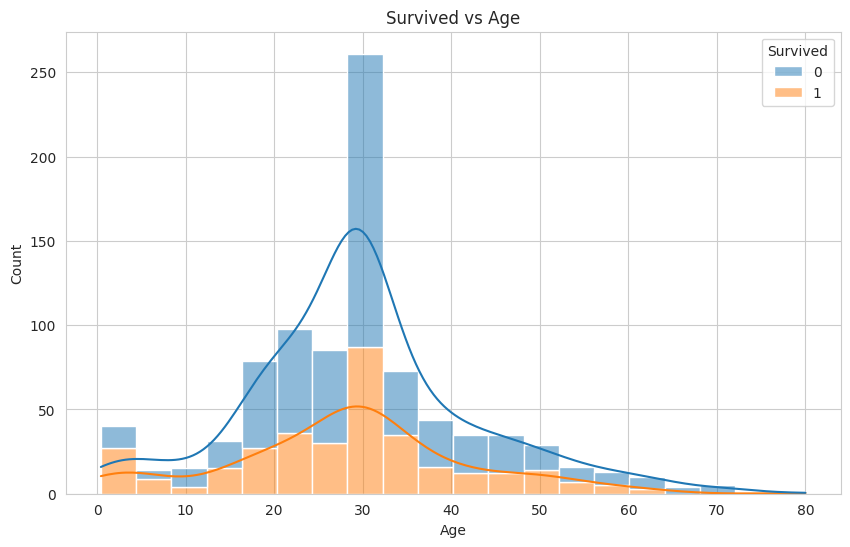

In [132]:
# Set the style of seaborn plots
sns.set_style("whitegrid")

# Histogram: Survived vs Age
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=20, kde=True)
plt.title('Survived vs Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

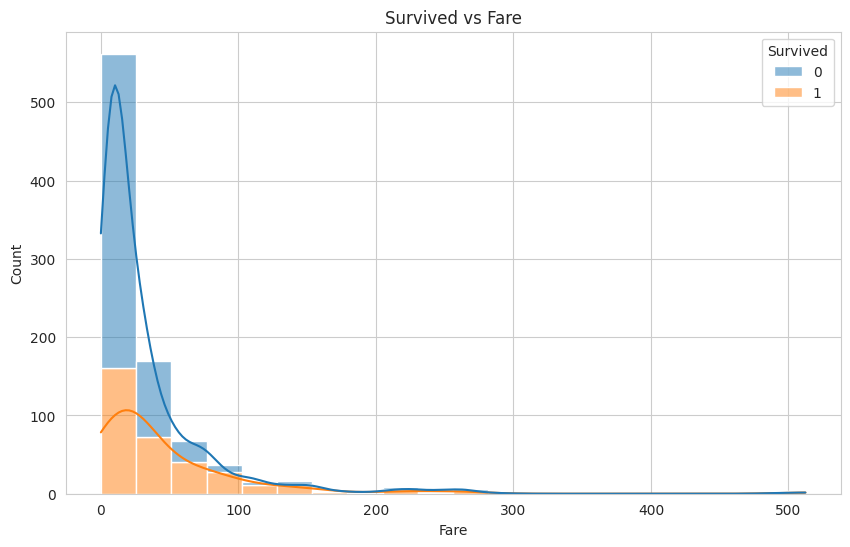

In [116]:
# Histogram: Survived vs Fare
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Fare', hue='Survived', multiple='stack', bins=20, kde=True)
plt.title('Survived vs Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

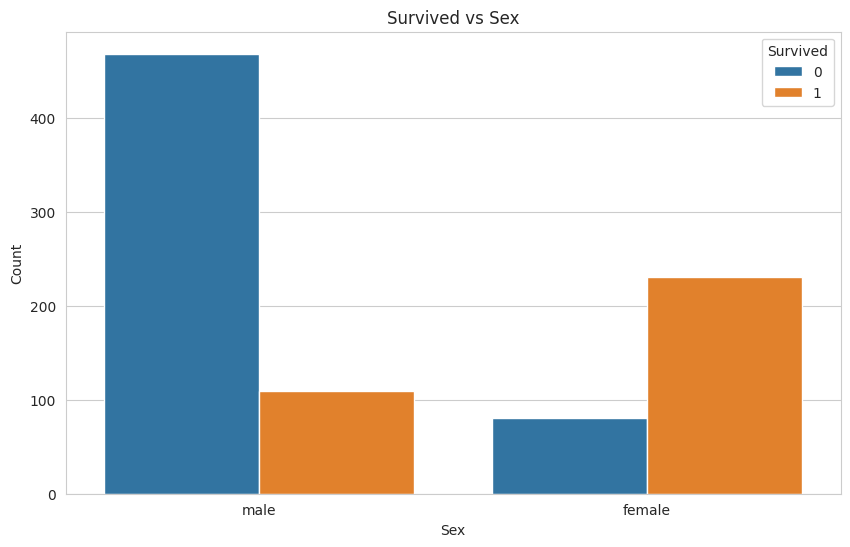

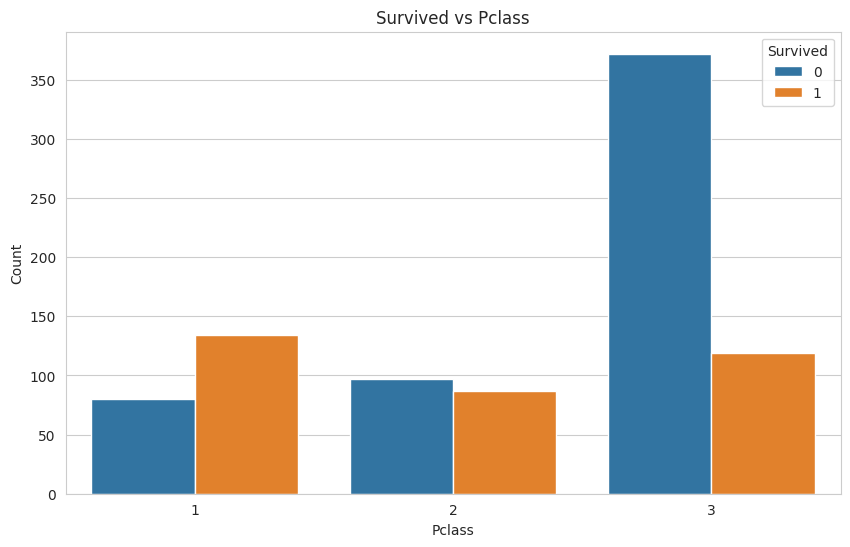

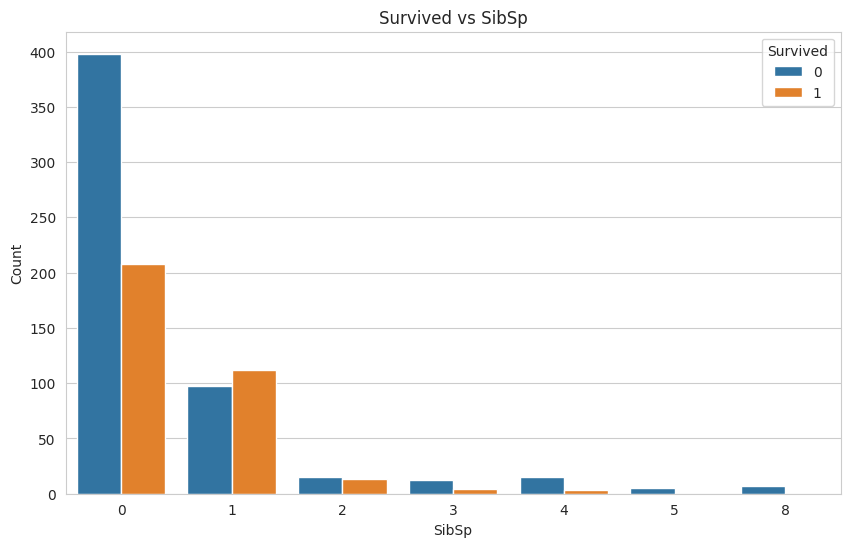

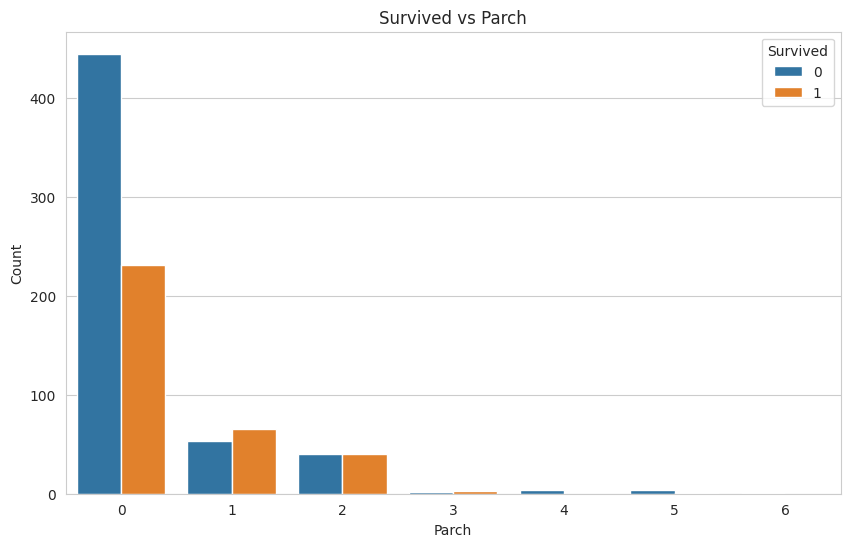

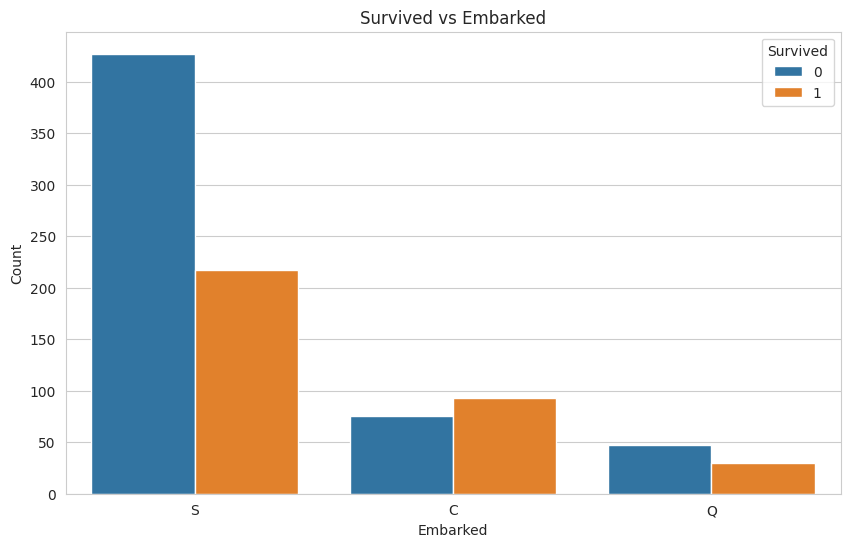

In [129]:
# Define the categorical variables
categorical_vars = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

# Create count plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=var, hue='Survived')
    plt.title(f'Survived vs {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

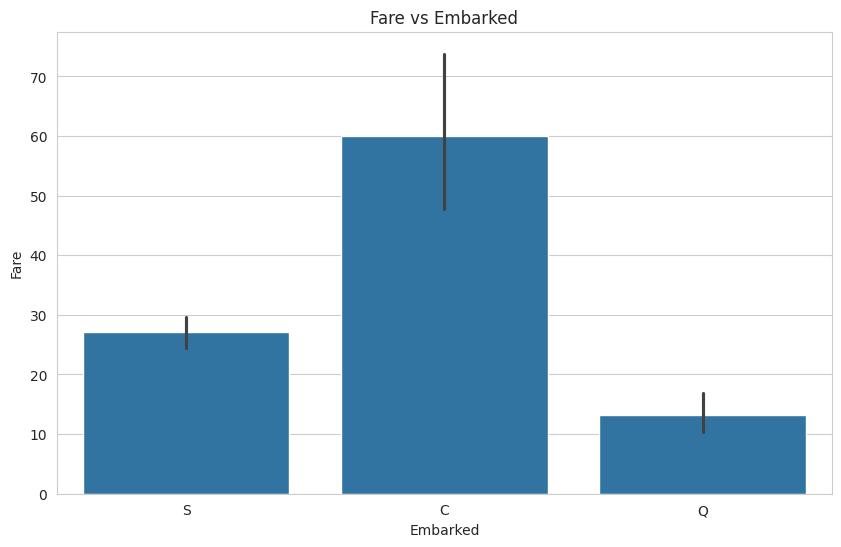

In [128]:
# Bar plot: Fare vs Embarked
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='Embarked', y='Fare')
plt.title('Fare vs Embarked')
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.show()